In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
insurance_data = pd.read_csv('insurance.csv') # Load the required dataset

In [ ]:
insurance_data.shape # To have an overall idea of the sixe of data we are dealing with

(1338, 7)

In [ ]:
insurance_data.columns # Analyze the name and rename if there are any errors

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_data.head(5) # Displays head of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Now lets look at the 5 Number Summary (Box plot variables) of the dataset
insurance_data.describe()
# Mean - central tendency ; tells about the average of that variable and prone to outliers.
# Count - Returns number of Non null values in that column
# Min - Minimum value in that column ; 0%
# I1 - 25%
# 12 - 50%
# I3 - 75%
# Max - Maximum value in that column ; 100%
# Variance - Mean of squared difference between each value and the mean of the variable.
# Std - Standard Deviation : Square root of variance and deduced as it has the same unit as the column unit


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


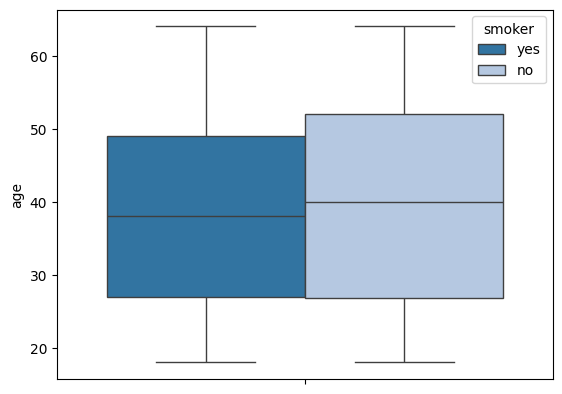

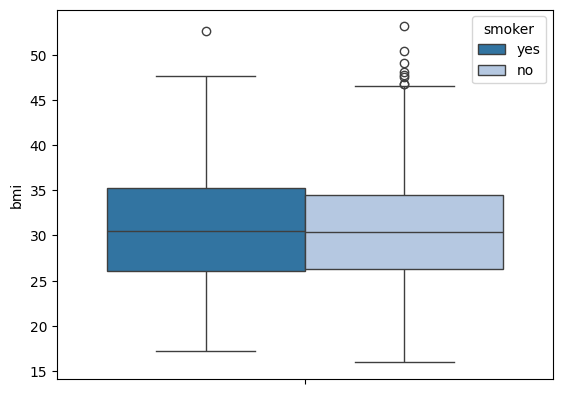

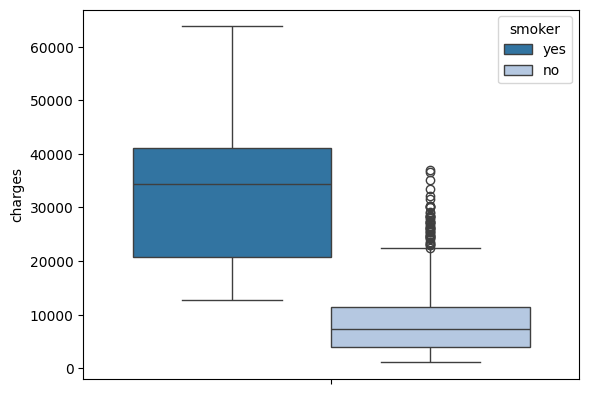

In [11]:
for x in ['age','bmi','charges']:
    sns.boxplot(
        data = insurance_data,
        y = x,
        hue = 'smoker',
        palette = 'tab20'
    )
    plt.show()


In [ ]:
# The size of the boxplot tells about the distribution of that variable and also the spread of it .
# The placement of the box : At center , At min end  or At max end tells us about the skewness of the data .
# It tells where most of the data lies in the quartiles and this can be confirmed using a histplot , displot and kdeplot later.
# The black spots are the outliers and these values are those who are less than the min value or more than the max value calculated by the formula .

# For example in the above graph as we can see the non smoker box plot is right skewed and tend to have more outliers which
# means that there are many values in that column which are above the maximum calculated 100%(percentile).

In [ ]:
# Covariance tells us about the direction of the correlated variables.
# It is not reliable as it is dependent on scale , so we use a better measure called correlation.
insurance_data.cov(numeric_only=True)

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [ ]:
# Correlation is in the domain -1 to 1 and the sign here denotes the type of correlation.
# The more positive the correlation it is closer to 1 and vice versa
# If the correlation is 0 that means the variables are not correlate
insurance_data.corr(numeric_only=True)
# Note : Correlation does not imply causation.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='age', ylabel='charges'>

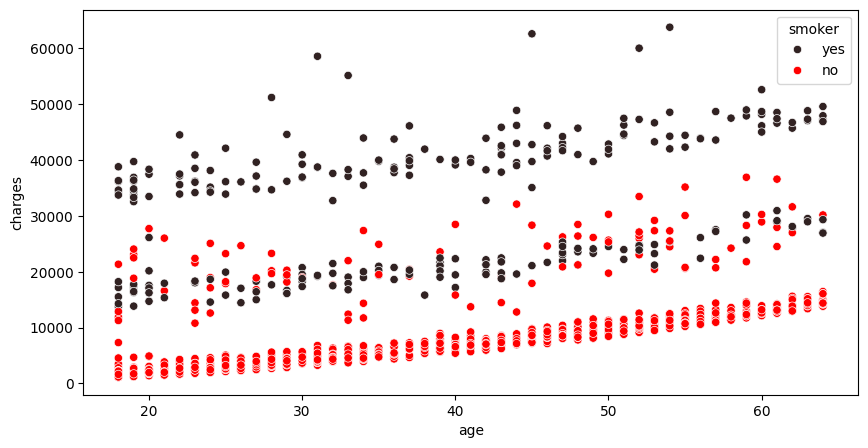

In [45]:
# As from the correlation observed we see that age and charges are highest correlated ones , so when scatterplot was
# plotted, I found out that there is a positive correlation between the non smoker and charges .
# Also found out that smoker tend to have very high charges .
plt.figure(figsize=(10,5))
sns.scatterplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    hue = 'smoker',
    palette = 'dark:red',
    # style = 'sex'
)

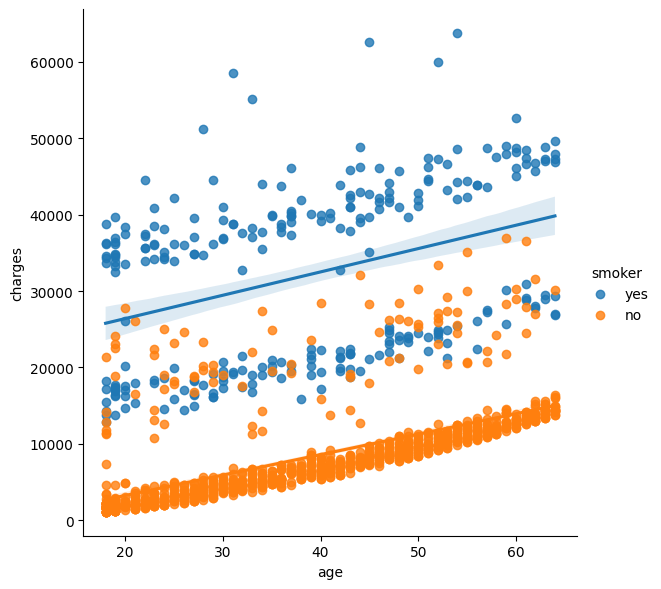

In [76]:
sns.lmplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    # col = 'sex',
    palette = 'tab10',
    hue = 'smoker',
    height = 6,
    aspect = 1,
)

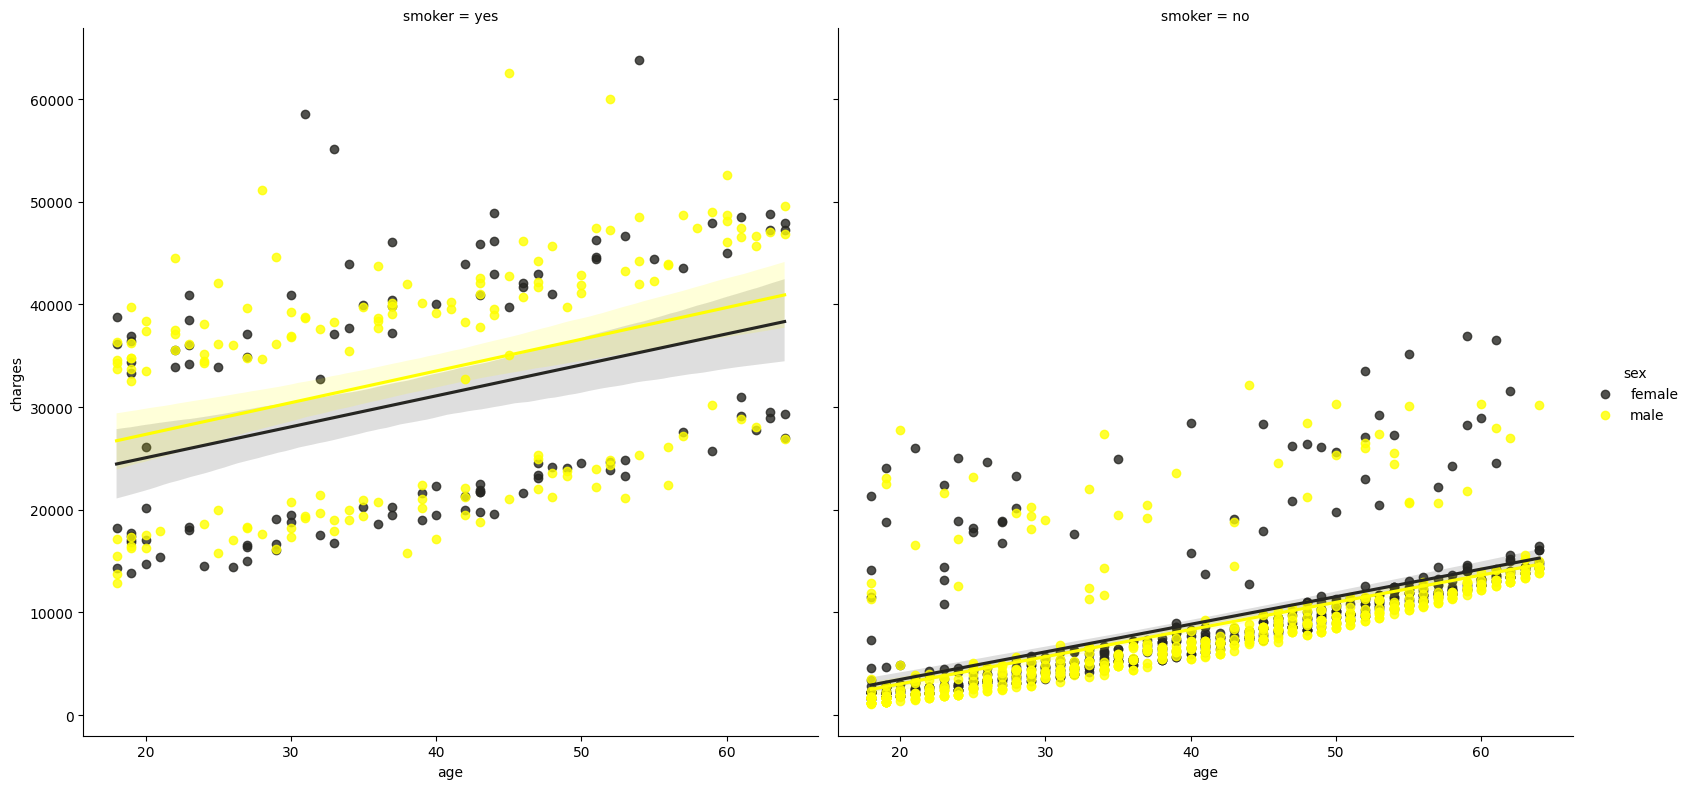

In [80]:
sns.lmplot(
    data = insurance_data,
    x = 'age',
    y = 'charges',
    col = 'smoker',
    palette = 'dark:yellow',
    hue = 'sex',
    height = 8,
    aspect = 1,
)

In [14]:
# Now to Analyze two categorical columns we can use a crosstab 

In [17]:
pd.crosstab(index=insurance_data['smoker'],columns=insurance_data['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


In [ ]:
# Helps us detect if there dtype for each and whether we need any transformations on them.
# Also we can check the Non null count to loom for the no of rows in each column having non value .
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# For better analysis on null values and to fetch the sum we use this:
insurance_data.isna().sum()
# As we dont have any null values here it is 0 , but if there are any it will be displayed with this function.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64